In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from math import pi

# Aufgabe 8: Fixpunktiteration

## Teil 1

Implementieren Sie die Funktion `fixpunktiteration` mit `xf,iter = fixpunktiteration(phi,xo,tol,kmax)` zur Bestimmung eines **Fixpunktes** `xf` der Funktion $\varphi:\mathbb{R} \rightarrow \mathbb{R}$ mittels der **Fixpunktiteration**
$$
x^{(k+1)}=\varphi(x^{(k)})
$$
ausgehend vom Startpunkt $x^{(0)}=\verb|xo|$.

Das zweite Resultat `iter` nennt die Anzahl der benötigten Iterationsschritte. `kmax` sei dabei die Maximalzahl an Iterationsschritten.

Die Iteration soll abgebrochen werden, wenn das **Abbruchkriterium**
$$
| x^{(k)} - x^{(k-1)}  | <\text{tol}
$$
erfüllt ist.

Achten Sie bitte darauf, dass $\varphi$ möglichst an keiner Stelle mehrfach ausgewertet wird.

In [13]:
def fixpunktiteration(phi, xo, tol, kmax):
    """
    Fixpunktiteration
        phi : Iterationsfunktion;  x[k+1] = phi(x[k]).
        xo  : Startpunkt;          x[0] = xo.
        tol : Abbruch bei Schrittlaenge < tol.
        kmax: maximale Iterationszahl.
    Ausgangsparameter:
        xk : zuletzt berechneter Punkt der Iteration.
        iter: Anzahl der Iterationen
    """
    xkm = xo.copy()
    iter = 1
    xk = phi(xkm)
    while (iter <= kmax) and (norm(xk - xkm) >= tol):
        xkm = xk
        xk = phi(xk)
        iter += 1
    return xk, iter

## Teil 2

Als Test-Beispiel betrachten Sie die Lösung der nichtlinearen Gleichung
$$
f(x)=0\quad\text{mit}\quad f(x)=e^x-\sin (x),
$$
mittels der Fixpunktiteration, wobei die Fixpunktgleichungen $x=\varphi_i(x)$ für $i = 1,\dots,4$, welche in der Vorlesung (Beispiel 4.1) angegeben wurden, verwendet werden sollen.


In [7]:
def phi1(x):
    return np.exp(x) - np.sin(x) + x

def phi2(x):
    return np.sin(x) - np.exp(x) + x


def phi3(x):
    return -np.arcsin(np.exp(x)) - pi

def phi4(x):
    return np.log(np.sin(x))

## Testskript

Das Testskript führt Aufrufe der Funktion `fixpunktiteration` durch und erzeugt eine Grafik dazu.
Jede der implementierten Funktionen wird für viele x0 auf
Konvergenz geprueft. Abhaengig davon wird der Startpunkt unterschiedlich
markiert:

* Grün markierte Startpunkte konvergieren zum Fixpunkt -3.183063.
* Rot  markierte Startpunkte konvergieren zum Fixpunkt -6.281314.
* Schwarz markierte Startpunkte konvergieren nicht.
* Türkis markierte Startpunkte enden mit einem Fehler.

Letzteres kann zum Beispiel am Versuch liegen, den Logarithmus einer
negativen Zahl zu berechnen oder den ArcSin ausserhalb des
Definitionsbereiches $[-\pi/2,\pi/2]$.

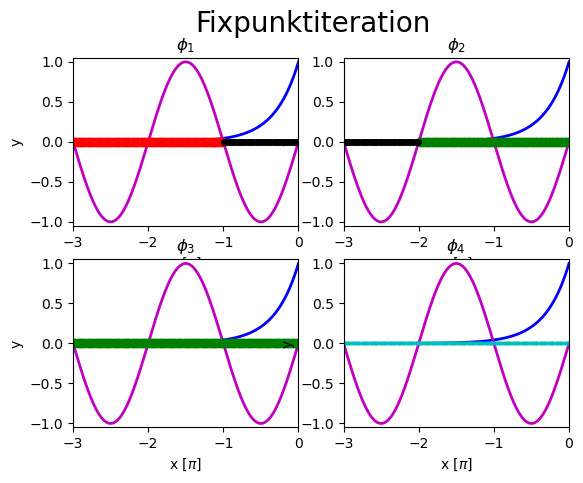

In [32]:
tol = 1e-6
kmax = 500
nx = 101

phy = np.array([phi1, phi2, phi3, phi4])
# alle Startpunkte, dividiert durch pi.
# Damit wird die X-Achse einfacher lesbar:
x0 = np.linspace(-3.0, 0.0, nx)
#
#  Berechnungen fuer Plot der Teil-Funktionen sin und exp:
#
xx = np.linspace(-3.0, 0.0, 501)
yy = np.exp(xx * pi)
zz = np.sin(xx * pi)
#
#  _Eine_ Grafik mit Subplots fuer jeden phy-Eintrag
#
nf = len(phy)
nr = 1 + (nf - 1) // 2  #  Anzahl Subplot-Zeilen  (rows)
nc = 1 if (nf < 2) else 2  #  Anzahl Subplot-Spalten (cols)
plt.figure("Fixpunktiteration")
plt.suptitle("Fixpunktiteration", fontsize=20)
#
#  Konvergenz-Berechnungen
#
for fx in range(nf):
    phi = phy[fx]
    # alle Zielpunkte und Iterationszahlen:
    y = np.zeros(nx)
    iter = np.zeros(nx, dtype=int)
    for i in range(nx):
        with np.errstate(over="raise", invalid="raise", divide="raise"):
            try:
                y[i], iter[i] = fixpunktiteration(phi, x0[i] * pi, tol, kmax)
            except FloatingPointError as e:
                message = e.args[0]
                if message == "overflow encountered in exp":
                    y[i] = np.inf
                else:
                    y[i] = np.nan
    #
    #  Kurven-Plot
    #
    plt.subplot(nr, nc, fx + 1)
    plt.plot(xx, yy, "b-", linewidth=2)
    plt.plot(xx, zz, "m-", linewidth=2)
    #
    #  Welche Version der Funktion phi haben Sie implementiert?
    #  Die Funktionswerte an der Stelle -1.75*pi unterscheiden sich deutlich;
    #  dieser Wert wird zur Identifikation herangezogen.
    #  Falls die Abstands-Schranke 1e-14 zu scharf sein sollte: daran duerfen
    #  Sie drehen.
    #
    phix = phi(-1.75 * pi)
    if abs(phix + 6.2007981000793349) < 1e-14:
        fit = "1"
    elif abs(phix + 4.7947761874849411) < 1e-14:
        fit = "2"
    elif abs(phix + 3.1456884899310076) < 1e-14:
        fit = "3"
    elif abs(phix + 0.34657359027997242) < 1e-14:
        fit = "4"
    else:
        fit = "?"
    #
    #  Die Startpunkte werden mit farbigen Kreisen markiert. Dabei richtet
    #  sich die Farbe nach dem Zielpunkt der Iteration.
    #
    xo1 = -3.183063  # 1.Fixpunkt nahe bei -pi, gruen
    xo2 = -6.281314  # 2.Fixpunkt nahe bei -2 pi, rot
    #
    #  Die folgenden Masken selektieren nach Zielpunkt der Iteration.
    #  Zu Startpunkten, die auf Rechenfehler fuehrten, gehoert der y-Wert  np.nan.
    #  Dieser Wert liefert bei jedem Zahl-Vergleich den Wert false. Darum sind
    #  bei der 4.Version keine gross-markierten Startpunkte zu finden...
    #
    x1 = x0[abs(y - xo1) < 0.0001]
    x2 = x0[abs(y - xo2) < 0.0001]
    x3 = x0[(abs(y - xo1) >= 0.0001) & (abs(y - xo2) >= 0.0001)]
    x4 = x0[np.isnan(y)]
    #
    plt.plot(x1, np.zeros(len(x1)), "go", markersize=6)
    plt.plot(x2, np.zeros(len(x2)), "ro", markersize=6)
    plt.plot(x3, np.zeros(len(x3)), "ko", markersize=4)
    plt.plot(x4, np.zeros(len(x4)), "co", markersize=2)
    plt.xlim([xx[0], xx[-1]])
    plt.ylim([-1.05, 1.05])
    plt.xlabel("x [$\pi$]")
    plt.ylabel("y")
    plt.title("$\phi_%s$" % fit)
plt.show()